In [210]:
# Libraries needed
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt 

In [211]:
# Read & Load CSV File
data = pd.read_csv('iris.csv')
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [212]:
# Get columns
print(list(data.columns))

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


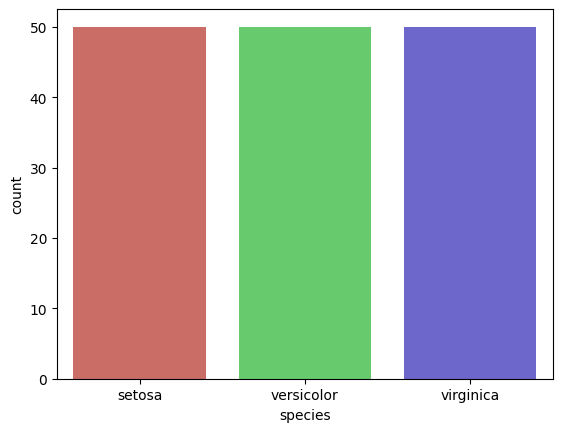

<Figure size 640x480 with 0 Axes>

In [213]:
# Count number of species
data['species'].value_counts()
sns.countplot(x='species', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [214]:
# Convert species parameter into numerical value
data["species"] = data ["species"].astype("category")
data["species"] = data ["species"].cat.codes

In [215]:
# 0 = setosa, 1 = versicolor, 2 = virginica
# This makes it possible for the logistic regression code below to easily check for accuracy
data['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int8

In [216]:
# Drop species column then assign the parameters that are left to X
# X are the predictor variables (sepal_length, sepal_width, petal_length, and petal_width)
X = data.drop(columns= "species")
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [217]:
# Assign the species parameter into Y
# Y means the dependent variable
Y = data["species"]

In [218]:
# Split the dataset into two which is training dataset and test dataset
# Set test size to 0.9 which means the test size will be 90% of the whole dataset and the other 10% will be for training
# You can also set this to a different ratio. A lower test size will result in a higher training size and better accuracy when making predictions
# Set the random state to 1 to keep the randomly generated values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.9, random_state = 1 )

In [219]:
# Display 10 records of training dataset of X
X_train.head(10)

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
68,6.2,2.2,4.5,1.5
50,7.0,3.2,4.7,1.4
101,5.8,2.7,5.1,1.9
20,5.4,3.4,1.7,0.2
25,5.0,3.0,1.6,0.2
134,6.1,2.6,5.6,1.4
71,6.1,2.8,4.0,1.3
129,7.2,3.0,5.8,1.6
79,5.7,2.6,3.5,1.0


In [220]:
# Display 10 records of testing dataset of X
X_test.head(10)

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
56,6.3,3.3,4.7,1.6
141,6.9,3.1,5.1,2.3
44,5.1,3.8,1.9,0.4
29,4.7,3.2,1.6,0.2
120,6.9,3.2,5.7,2.3


In [221]:
# Initialized StandardScaler module
# Standard Scaler removes the mean and scaling to unit variance in order to avoid domination between datasets, refer to sklearn Standard Scaler for in dept explanation
# (Part of data cleaning)
scaler = StandardScaler()

In [222]:
# Mean and Standard Deviation are stored earlier and can be used by doing transform
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [223]:
X_train_sc

array([[-0.55510317,  0.11097419, -0.0138136 ,  0.04220123],
       [ 0.23042019, -2.21948381,  0.19339034,  0.35871046],
       [ 1.48725756,  1.1097419 ,  0.33152629,  0.20045585],
       [-0.3979985 , -0.55487095,  0.6077982 ,  0.99172893],
       [-1.02641719,  1.77558705, -1.74051302, -1.69859955],
       [-1.65483588,  0.44389676, -1.809581  , -1.69859955],
       [ 0.07331551, -0.88779352,  0.95313808,  0.20045585],
       [ 0.07331551, -0.22194838, -0.15194955,  0.04220123],
       [ 1.80146691,  0.44389676,  1.09127404,  0.51696508],
       [-0.55510317, -0.88779352, -0.49728943, -0.43256262],
       [ 0.38752486, -0.22194838,  0.6077982 ,  0.35871046],
       [ 0.54462953,  0.77681933,  0.88407011,  0.83347431],
       [ 0.38752486, -1.22071609,  0.46966224,  0.35871046],
       [ 1.01594355,  0.77681933,  0.95313808,  1.78300201],
       [-1.81194055,  0.77681933, -1.87864897, -1.85685417]])

In [224]:
X_test_sc

array([[-0.3979985 ,  3.77312247, -2.08585291, -1.69859955],
       [-1.49773121, -1.22071609, -0.84262932, -0.274308  ],
       [ 0.85883887,  0.44389676,  0.12432236,  0.20045585],
       [-1.02641719,  3.4401999 , -2.01678493, -1.38209032],
       [ 2.90119961,  3.10727733,  1.5056819 ,  1.14998355],
       [ 0.38752486,  1.44266448,  0.33152629,  0.51696508],
       [ 1.33015289,  0.77681933,  0.6077982 ,  1.62474739],
       [-1.49773121,  3.10727733, -1.60237707, -1.38209032],
       [-2.1261499 ,  1.1097419 , -1.809581  , -1.69859955],
       [ 1.33015289,  1.1097419 ,  1.02220606,  1.62474739],
       [-0.71220785, -0.55487095, -0.0138136 ,  0.04220123],
       [-1.02641719,  3.4401999 , -1.74051302, -1.38209032],
       [ 1.64436224,  0.44389676,  1.16034201,  1.30823816],
       [ 0.54462953,  1.1097419 ,  0.19339034,  0.35871046],
       [-0.08378916,  0.11097419,  0.19339034,  0.35871046],
       [-2.59746391,  1.1097419 , -2.01678493, -1.69859955],
       [-0.3979985 , -0.

In [225]:
# Initialize the Logistic Regression Function and Fits data
# Use the cleaned training data earlier
logistic_regression = LogisticRegression(random_state = 0).fit(X_train_sc, Y_train)

In [226]:
# Train the logistic regression model on the training data
logistic_regression.predict(X_train_sc)

array([1, 1, 2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0], dtype=int8)

In [227]:
# Now have it predict the test data
logistic_regression.predict(X_test_sc)

array([0, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 0, 1, 2,
       2, 0, 2, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2,
       2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 2], dtype=int8)

In [241]:
# Checks how accurate the output X_train_sc values are
print(round(logistic_regression.score(X_train_sc,Y_train),2)*100,"% Accuracy on training data")

93.0 % Accuracy on training data


In [242]:
# Checks how accurate the output X_test_sc values are
# It is fairly a good sign that the accuracy of your train and test X are almost the same
# If you had a higher test_size, your accuracy here will be higher
print(round(logistic_regression.score(X_test_sc,Y_test),2)*100,"% Accuracy on test data")

91.0 % Accuracy on training data
